# Different pressure to depth conversions
- This notebook shows the different pressure to depth conversions available in DiadFit

### Install DiadFit if you havent already!

In [ ]:
#!pip install --upgrade DiadFit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.69dev'

### First, lets make a linearly spaced array of pressures between 0 and 10 kbar

In [2]:
P_linspace=np.linspace(0, 10, 1000)

## Now lets calculate different options to convert this into depth

In [3]:
Depth_calc_2step=pf.loop_pressure_depth_2step(P_kbar=P_linspace,
            d1=14, rho1=2800, rho2=3100)
Depth_calc_3step=pf.loop_pressure_depth_3step(P_kbar=P_linspace,
            d1=5, d2=14, rho1=2700, rho2=2900, rho3=3100)

depth_constant=10**(-3)*(P_linspace*100000000)/(2900*9.8)

Depth_Ryan_lerner=pf.convert_pressure_to_depth(P_kbar=P_linspace, model='ryan_lerner')
Depth_Ras=pf.convert_pressure_to_depth(P_kbar=P_linspace, model='rasmussen')

### Lets visualize these
- Here, we show the pressure vs depth, and the difference between 2 and 3 step, and a constant density

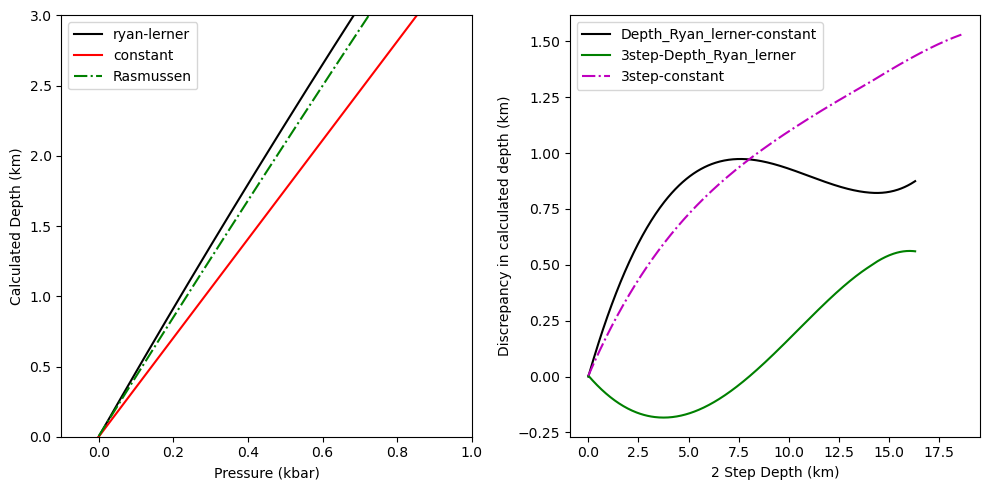

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(P_linspace, Depth_Ryan_lerner, '-k', label='ryan-lerner')
ax1.plot(P_linspace, depth_constant, '-r', label='constant')
ax1.plot(P_linspace, Depth_Ras, '-.g', label='Rasmussen')
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, 3])
ax1.legend()
ax2.plot(Depth_calc_2step, Depth_Ryan_lerner-depth_constant, '-k', label='Depth_Ryan_lerner-constant')

ax2.plot(Depth_calc_2step, Depth_Ras-Depth_Ryan_lerner, '-g', label='3step-Depth_Ryan_lerner')
ax2.plot(Depth_calc_2step, Depth_Ras-depth_constant, '-.m', label='3step-constant')

ax2.legend()
ax2.set_ylabel('Discrepancy in calculated depth (km)')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('2 Step Depth (km)')
ax1.set_ylabel('Calculated Depth (km)')
fig.tight_layout()

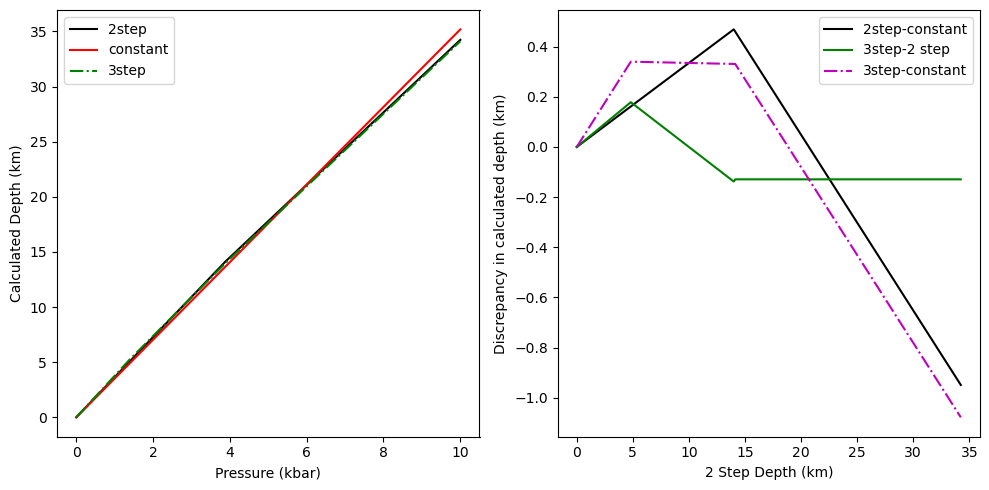

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(P_linspace, Depth_calc_2step, '-k', label='2step')
ax1.plot(P_linspace, depth_constant, '-r', label='constant')
ax1.plot(P_linspace, Depth_calc_3step, '-.g', label='3step')

ax1.legend()
ax2.plot(Depth_calc_2step, Depth_calc_2step-depth_constant, '-k', label='2step-constant')

ax2.plot(Depth_calc_2step, Depth_calc_3step-Depth_calc_2step, '-g', label='3step-2 step')
ax2.plot(Depth_calc_2step, Depth_calc_3step-depth_constant, '-.m', label='3step-constant')

ax2.legend()
ax2.set_ylabel('Discrepancy in calculated depth (km)')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('2 Step Depth (km)')
ax1.set_ylabel('Calculated Depth (km)')
fig.tight_layout()